# Tutorial #1 - Calculando integrales propias de la forma $\displaystyle\int_a^b f(x) \, dx$

En este tutorial aprenderá a aproximar integrales usando la librería [Scipy](https://www.scipy.org/).

Las librerías adicionales que necesita son:

- [Numpy](https://numpy.org/) para manejar arreglos y
- [Matplotlib](https://matplotlib.org/) para graficar.

In [ ]:
# Definimos la funcion que deseamos integrar.
def f(x):
    return x

"""
Usamos scipy para realizar aproximacion numerica.
El sub-paquete scipy.integrate provee algunas técnicas de integración
quad es un método que permite integrar una función de una variable entre dos puntos,
estos puntos pueden, incluso, ser +inf o -inf i.e. puede evaluar integrales impropias.
"""
import scipy.integrate as integrate

# quad devuelve el valor de la integral, que guardaremos en la variable I y 
# también devuelve un estimado del error en el resultado
I, epsilon = integrate.quad(f, 0, 1)

print('El valor de la integral es: {}, aproximada con un error de {}'.format(I, epsilon))

El valor de la integral es: 0.5, aproximada con un error de 5.551115123125783e-15


### Ejemplo:
Calcular $\displaystyle\int_{-3}^3 f(x) \, dx$ para
$$f(x) = \begin{cases} -x & x < 0 \\ x^2 & x \geq 0 \end{cases} $$

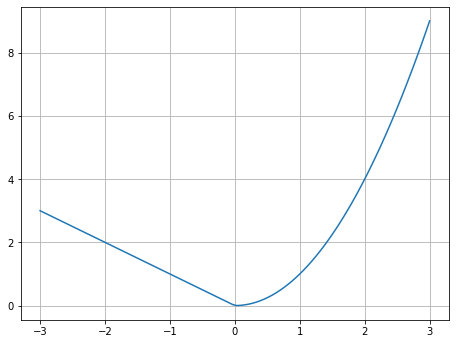

In [ ]:
# Definimos la función f por partes
def f(x):
    if x < 0:
        return -x
    else:
        return x**2

# Usaremos matplotlib para graficar y numpy para manejar arreglos
import matplotlib.pyplot as plt 
import numpy as np
# configurar el tamaño de las graficas
zoom = 1.2
w, h = 6.4 * zoom, 4.8 * zoom
plt.rcParams["figure.figsize"] = (w, h)


# graficaremos en el intervalo [-3, 3] tomando 100 puntos
dominio = np.linspace(-3, 3, 100)
# El propósito de np.vectorize es hacer que f pueda recibir arreglos (y devolver arreglos) en vez
f_vectorizada = np.vectorize(f)
# Evaluamos f, es decir hacemos y = f(x) para x en [-3, 3]
y = f_vectorizada(dominio)

# plot es para graficar la funcion f en el dominio dado
plt.plot(dominio, y)
# para mostrar la cuadricula en la gráfica
plt.grid()
# para "desplegar" la gráfica
plt.show()

In [ ]:
# Evaluamos la integral
I, epsilon = integrate.quad(f, -3, 3)
print('El valor de la integral es: {}, aproximada con un error de {}'.format(I, epsilon))

El valor de la integral es: 13.500000000000002, aproximada con un error de 1.4921397450962104e-13


# Calculando coeficientes de Fourier

Observe que el argumento que recibe la función quad es una función, i.e. recibe una variable real $x$ y devuelve un valor $x$. Debemos tener especial cuidado con integrar expresiones del tipo:
$$ \int_{-L}^L f(x) \, \sin \left( \frac{\pi \, n \, x}{L} \right) \, dx $$

Calcularemos los coeficientes de Fourier para la función:
$$ f(x) = \begin{cases} -x & -2 \leq x < 0 \\ x & 0 \leq x < 2 \end{cases} \qquad f(x + 4) = f(x).$$

# Iniciamos por definir la funcion.

## Task1:
Utilice lo visto en clase para definir la función para todo x.
Verifique que su resultado es correcto desplegando una gráfica de la función.


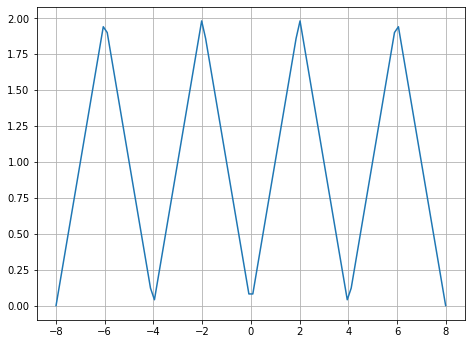

In [133]:

### Sol:

def f(x):
    # período

    T = 4.0 
    L = T/2
    res = x % T
    
    if (res >= L):
        return (T - res)
    else:
        return res

# graficaremos 4 períodos

dominio = np.linspace(-8, 8, 100)
f_vectorizada = np.vectorize(f)
y = f_vectorizada(dominio)

plt.plot(dominio, y)
plt.grid()
plt.show()


In [ ]:
# Definimos parametros
L = 2
# intentemos calcular el primer coeficiente, es decir a1
n = 1

In [112]:
# Note como esto NO funciona

I, epsilon = integrate.quad( f(x)*np.cos(np.pi*n*x/L), -L, L)

NameError: ignored

In [ ]:
"""
Debemos construir una funcion que haga lo que necesitamos.
Forma A: Podemos usar una funcion explicita.
"""

def integrando(x):
    return f(x)*np.cos(np.pi*n*x/L)

I, epsilon = integrate.quad(integrando, -L, L)
print('El valor de la integral es: {}, aproximado con un error de {}'.format(I, epsilon))

El valor de la integral es: -1.6211389382774044, aproximado con un error de 2.7977620220553945e-14


In [ ]:
"""
Debemos construir una funcion que haga lo que necesitamos.
Forma B: Podemos usar expresiones lambda
"""

integrando = lambda x: f(x)*np.cos( (np.pi * n * x) / L)

I, epsilon = integrate.quad( integrando, -L, L )
print('El valor de la integral es: {}, aproximado con un error de {}'.format(I, epsilon))

El valor de la integral es: -1.6211389382774044, aproximado con un error de 2.7977620220553945e-14


In [ ]:
# Podemos iterar sobre n para obtener todos los coeficientes que deseamos
# Maximo numero de coeficientes que vamos a calcular
Nmax = 10 
for n in range(1, Nmax + 1):

    integrando = lambda x: f(x)*np.cos( (np.pi * n * x) / L)
    
    I, epsilon = integrate.quad(integrando, -L , L)
    an = (1/L)*I
    print('a_{} = {} con error {}'.format(n, an, epsilon))

a_1 = -0.8105694691387022 con error 2.7977620220553945e-14
a_2 = 0.0 con error 2.842170943040401e-14
a_3 = -0.0900632743487446 con error 6.032951915813101e-12
a_4 = 2.7755575615628914e-17 con error 2.935936382897353e-09
a_5 = -0.03242277876554797 con error 2.883936104790437e-14
a_6 = -4.458239333260394e-16 con error 2.3806928379620923e-12
a_7 = -0.016542234064054855 con error 1.2938230001258155e-10
a_8 = -8.396061623727746e-16 con error 2.935936216363899e-09
a_9 = -0.010007030483193267 con error 1.4182215139733199e-09
a_10 = -1.3183898417423734e-16 con error 2.8035941138889923e-14


## Task 2
1. Despliegue las gráficas de la N-ésima suma parcial de Fourier $S_N$ y la funcion original $f(x)$.
2. Estime la norma del error $\varepsilon$:

$$\varepsilon =  \left\| f(x) - S_N (x) \right\|$$


In [115]:
# sol.
# Podemos usar un arreglo diferente para hacerlos mas claro.

def suma_parcial_Fourier(N):
    # Calculamos a_0
    I, _ = integrate.quad(f, -L, L)
    a_0 = ( 1.0 / (2 * L) ) * I

    #Para a_n
    def integrando(n, L, f):
        return lambda x: f(x)*np.cos( (n * np.pi * x) / L)

    a_n = [ (1.0 / L) * integrate.quad(integrando(k, L, f), -L, L)[0] for k in range(1, N + 1) ]
    f_hat = lambda x: a_0 + sum([ a_n[k] * np.cos( (np.pi * (k + 1) * x) / L) for k in range(N)] )
    
    return f_hat

# Veamos N = 4, usted puede intentar con diferentes valores de N
    N = 4
    f_hat = suma_parcial_Fourier(N)

    dominio = np.linspace(-L, L, 100)
    f_hat_vectorizada = np.vectorize(fourier)
    y_serie = f_hat_vectorizada(dominio)
    y = f_vectorizada(dominio)

# graficamos la N-esima suma parcial
    import matplotlib.pyplot as plt 
    plt.plot(dominio, y_serie, color='blue', label='$S_N$')

# graficamos la función original
    plt.plot(dominio, y, color='green', label='$f(t)$')
    plt.grid()

# para mostrar el label de cada grafica
    plt.legend()
    plt.show()


Veamos una animacion

In [114]:
from ipywidgets import interact, IntSlider

def mostrar_serie(N):
    f_hat = suma_parcial_Fourier(N)

    dominio = np.linspace(-L, L, 100)
    f_hat_vectorizada = np.vectorize(f_hat)
    y_serie = f_hat_vectorizada(dominio)
    y = f_vectorizada(dominio)

    # graficamos la N-esima suma parcial
    plt.plot(dominio, y_serie, color='red', label='$S_N$')
    # graficamos la función original
    plt.plot(dominio, y, color='green', label='$f(t)$')
    plt.grid()
    # para mostrar el label de cada grafica
    plt.legend()
    plt.show()

interact(mostrar_serie, N = IntSlider(min=1, max=20, step=1, value=1))
# Puede mover el slider para ver la serie mientras varía el valor de N

interactive(children=(IntSlider(value=1, description='N', max=20, min=1), Output()), _dom_classes=('widget-int…

<function __main__.mostrar_serie>

Ahora estimemos el error, recuerde que con este producto interno $$\Vert f(x) \Vert^2 = \displaystyle\int_{-L}^L f^2(x) dx$$

In [ ]:
# Estimación del error cuando N = 4
f_hat = suma_parcial_Fourier(4)
diferencia = lambda x: ( f(x) - f_hat(x) )**2

I, _ = integrate.quad(diferencia, -L, L)

print('Error: {}'.format(np.sqrt(I)))

Error: 0.05536079805154472


Veamos que pasa con el error cuando incrementamos $N$

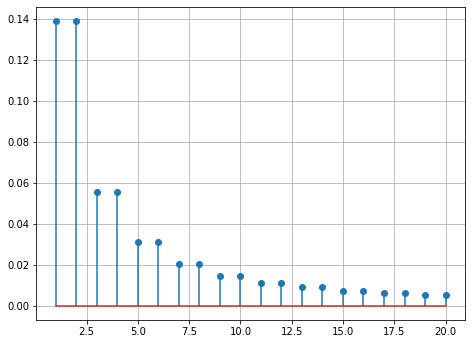

In [ ]:
Nmax = 20
errores = []
for N in range(1, Nmax + 1):
    f_hat = suma_parcial_Fourier(N)
    diferencia = lambda x: ( f(x) - f_hat(x) )**2

    I, _ = integrate.quad(diferencia, -L, L)
    error = np.sqrt(I)
    
    errores.append(error)

n = list(range(1, Nmax+1))
plt.stem(n, errores, use_line_collection=True)
plt.grid()
plt.show()

Note que $\varepsilon \rightarrow 0$.

# Tarea

Su tarea será implementar una función que calcule la n-ésima suma parcial de la serie de Fourier para cualquier función $f$ definida en un intervalo $[-L, L]$ y además graficar esta aproximación.

Dividiremos esta tarea en partes para que le sea más fácil implementarla.

1. Calcule $a_0 = \displaystyle \int_{-L}^L f(x) dx$

In [ ]:
def calcular_a0(f, L):
    """
    TODO: Implemente la función que calcule el coeficiente a0 
    HINT: tiene que usar integrate.quad como en el tutorial
    """
    integrando = lambda x: f(x)
    I, _ = integrate.quad( integrando, -L, L )
    a_0 = (1/(2*L))*I
    
    return a_0

Esto le servirá para verificar si implementó bien la función anterior

In [ ]:
f = lambda x: x**2
I = calcular_a0(f, 2)
print('a0 = {}'.format(I))

a0 = 1.3333333333333333


La respuesta debería ser `a0 = 1.3333333333333333`

2. Calcule $a_n = \displaystyle \int_{-L}^L f(x) \cos \left( \dfrac{n \pi x}{L}\right)dx$

In [ ]:
def calcular_an(f, L, n):
    """
    TODO: Implemente la función que calcule el coeficiente an.
    HINT: Primero defina una función que sea el integrando f*cos y luego use integrate.quad
    """
    integrando = lambda x: f(x)*np.cos( (np.pi * n * x) / L)
    I, _ = integrate.quad(integrando, -L , L)
    a_n = (1/L)*I
    return a_n 

Esto le servirá para verificar si implementó bien la función anterior

In [ ]:
def f(x):
    if x < 0:
        return x**2 + 1
    else:
        return np.sin(x)
    
I = calcular_an(f, 5, 12)
print('a10 = {}'.format(I))

a10 = 0.032615696534688314


La respuesta debería ser `a10 = 0.03261569653468831`

3. Calcule $b_n = \displaystyle \int_{-L}^L f(x) \sin \left( \dfrac{n \pi x}{L}\right)dx$

In [134]:
def calcular_bn(f, L, n):
    """
    TODO: Implemente la función que calcule el coeficiente an.
    HINT: Primero defina una función que sea el integrando f*cos y luego use integrate.quad
    """
    integrando = lambda x: f(x)*np.sin( (np.pi * n * x) / L)
    I, _ = integrate.quad(integrando, -L , L)
    b_n = (1/L)*I
    return b_n

Esto le servirá para verificar si implementó bien la función anterior

In [135]:
f = lambda x: np.heaviside(x, 0) * x**2
    
I = calcular_bn(f, 5, 4)
print('a4 = {}'.format(I))

a4 = -1.9894367886486917


La respuesta debería ser `a4 = -1.9894367886486914`

4. Calcule $S_N(x) = a_0 + \displaystyle \sum_{n = 1}^N\left\{a_n \cos\left( \dfrac{n \pi  x}{L}\right) + b_n \sin \left( \dfrac{n \pi x}{L} \right) \right\}$

In [136]:
def S_N(f, L, N):
    """
    TODO: Implemente la función que calcule la N-esima suma parcial de Fourier para f
    HINT: Use las funciones que implementó para el calculo de los coeficientes a0, an y bn
    """
    #1. calcule el a0
    a_0 = calcular_a0(f,L)
    
    #2. calcule los an para n variando desde 1 hasta N 
    # an = [ calcular_an (argumentos) for indice in range(1, N + 1)]
    a_n = [calcular_an(f, L, i) for i in range (1, N+1)]
    
    #3. calcule los bn para n variando desde 1 hasta N 
    # bn = [ calcular_bn (argumentos) for indice in range(1, N + 1)]
    b_n = [calcular_bn(f, L, i) for i in range (1, N+1)]
    
    #4. calcule la suma 
    suma = lambda x: a_0 + sum([a_n[i-1]*np.cos(i*np.pi*x / L)  + b_n[i-1]*np.sin(i*np.pi*x / L) for i in range(1, N + 1)])
    
    #5. Retorne la suma
    return suma

Esto le servirá para verificar si implementó bien la función anterior

In [138]:
f = lambda x: np.heaviside(x, 0) * x**2
    
s = S_N(f, 5, 1)
print('S10 = {}'.format(s))
print('S10(2) = {}'.format(s(2)))
print('S10(15) = {}'.format(s(15)))

S10 = <function S_N.<locals>.<lambda> at 0x7f35d3590400>
S10(2) = 7.102132372968682
S10(15) = 9.232725848783558


La respuesta debería ser:

`S10 = <function SN.<locals>.<lambda> at ...`

`S10(2) = 56.34399519817674`

`S10(15) = 16.33637075608222`

5. Grafique $S_N(x)$ y $f(x)$

In [142]:
def graficar(f, L, N):
    """
    TODO: graficar la n-esima suma de Fourier y la funcion f
    """
    # calcule la N-esima serie de Fourier i.e. llame a S_N(f, L, N) y guardelo en la variable f_hat
    f_hat = S_N(f,L,N)
    

    ### De aquí en adelante no tiene que hacer nada ###
    ### Graficamos en el intervalo [-3L, 4L] ###
    dominio = np.linspace(-2*L, 3*L, 500)
    f_hat_vectorizada = np.vectorize(f_hat)
    y_serie = f_hat_vectorizada(dominio)
    
    ### hacemos f periódica para graficarla ###
    def f_periodica(x):
        T = 2*L
        g = lambda x: f(x) if 0 < x <= L else f(x-T) 
        r = x % T
        return g(r)
    
    f_vectorizada = np.vectorize(f_periodica)
    y = f_vectorizada(dominio)
    # graficamos la N-esima suma parcial
    plt.plot(dominio, y_serie, color='red', label='$S_{}$'.format( '{%d}' % N ))
    # graficamos la función original
    plt.plot(dominio, y, color='green', label='$f(t)$')
    plt.grid()
    # para mostrar el label de cada grafica
    plt.legend()
    plt.show()

In [ ]:
L = 1
N = 5
graficar(f, L, N)

Hagámoslo interactivo

In [141]:
# Definimos la función
# Intente con sus propias funciones
f = lambda x: np.heaviside(x, 0) * x**2

# Limite superior de la suma
Nmax = 20
sn = lambda n: graficar(f, L,  n)
interact(sn, n = IntSlider(min=1, max=Nmax, step=1, value=1))

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

<function __main__.<lambda>>